In [1]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
import os

import GPy

import daft

import teaching_plots as plot

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':10})
rc("text", usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
def connect_nodes_to(pgm, nodes, layer_label, layers, layer):
    """Set edges to connect nodes to"""
    for node in nodes:
        for k in range(layers[layer]):
            pgm.add_edge(node, layer_label[layer].format(index=k+1))

def connect_nodes_from(pgm, nodes, layer_label, layers, layer):
    """Set edges to connect nodes from"""
    for node in nodes:
         for k in range(layers[layer]):
                pgm.add_edge(layer_label[layer].format(index=k+1), node)


In [3]:
    
shape = [5, 5]
xpadding = [1, 2.25]
ypadding = [0, 0]
pgm = daft.PGM(shape=[shape[0]+xpadding[0]+xpadding[1], shape[1]+ypadding[0] + ypadding[1]],
               origin=[-0.5, 0.5], 
               grid_unit=3, 
               node_unit=1.6, 
               observed_style='shaded',
               line_width=1)
layers = [0, 4, 4, 5, 0]
layer_label = ['x_{index}', 'h_{{1,{index}}}', 
               'h_{{2,{index}}}', 'h_{{3,{index}}}', 'y_{index}']
layer_observed = [True, False, False, False, True]
layer_fixed = [False, False, False, False, False]
layer_text = [r'', 
              r'latent representation of disease',
              r'',
              r'',
              r'']

yoffset = 1
maxwidth = max(layers)

/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (101) of font (/usr/local/texlive/2015/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (112) of font (/usr/local/texlive/2015/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font (/usr/local/texlive/2015/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (103) of font (/usr/local/

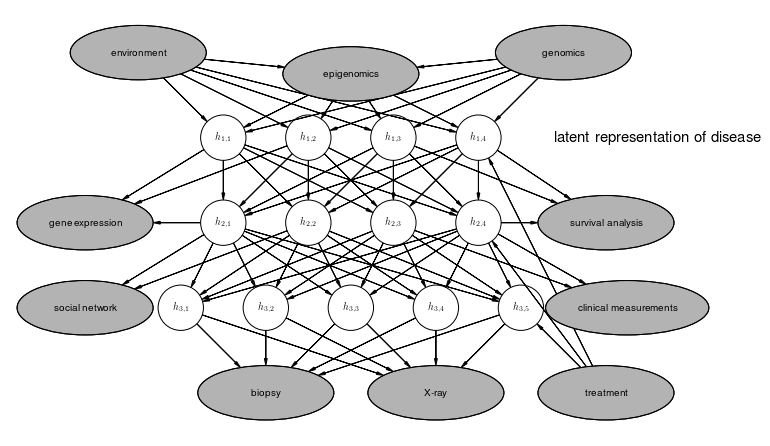

In [4]:
for i in range(len(layers)):
    posy = yoffset + shape[1] - (i+1)*shape[1]/(len(layers))+ypadding[0]        
    for j in range(layers[i]):
        xoffset = (shape[0])*(maxwidth-layers[i])/(2*(maxwidth))+0.5
        posx = xoffset + j*(shape[0])/(maxwidth) +xpadding[0]
        pgm.add_node(daft.Node(layer_label[i].format(index=j+1),
                               ('$' + layer_label[i] + '$').format(index=j+1), 
                               posx, posy,
                               observed=layer_observed[i],
                               fixed=layer_fixed[i]))
    for j in range(layers[i]):
        if i > 0:
            for k in range(layers[i-1]):
                    pgm.add_edge(layer_label[i-1].format(index=k+1), 
                                 layer_label[i].format(index=j+1))

pgm.add_node(daft.Node('epigenomics', r'epigenomics', 
                       3.5, 4.75, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('genomics', r'genomics', 
                       6, 5, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('environment', r'environment', 
                       1, 5, observed=True, aspect=2.5, scale=1.2))
pgm.add_edge('genomics', 'epigenomics')
pgm.add_edge('environment', 'epigenomics')

pgm.add_node(daft.Node('gene_exp', r'gene expression', 
                       0.375, 3, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('survival', r'survival analysis', 
                       6.5, 3, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('treatment', r'treatment', 
                       6.5, 1, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('measure', r'clinical measurements', 
                       6.75, 2, observed=True, aspect=3, scale=1.2))
pgm.add_node(daft.Node('social', r'social network', 
                       0.375, 2, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('biopsy', r'biopsy', 
                       2.5, 1, observed=True, aspect=2.5, scale=1.2))
pgm.add_node(daft.Node('x-ray', r'X-ray', 
                       4.5, 1, observed=True, aspect=2.5, scale=1.2))

nodes = ['epigenomics', 'genomics', 'environment']
connect_nodes_to(pgm, nodes, layer_label, layers, 1)

pgm.add_edge('h_{1,3}', 'survival')
pgm.add_edge('h_{1,4}', 'survival')
pgm.add_edge('h_{2,4}', 'survival')

pgm.add_edge('h_{1,1}', 'gene_exp')
pgm.add_edge('h_{1,2}', 'gene_exp')
pgm.add_edge('h_{2,1}', 'gene_exp')

pgm.add_edge('h_{2,1}', 'social')
pgm.add_edge('h_{2,2}', 'social')

pgm.add_edge('h_{2,3}', 'measure')
pgm.add_edge('h_{2,4}', 'measure')

pgm.add_edge('treatment', 'h_{1,4}')
pgm.add_edge('treatment', 'h_{3,5}')
pgm.add_edge('treatment', 'h_{2,4}')


nodes=['biopsy', 'x-ray']
connect_nodes_from(pgm, nodes, layer_label, layers, 3)

ctx = pgm.render()
fig = ctx.figure
ax = plt.gca()
for i in range(len(layers)):
    posy = yoffset + shape[1] - (i+1)*(shape[1]-ypadding[0])/(len(layers))
    posx = shape[0] + xpadding[1]/2 +xpadding[0] 
    x, y = pgm._ctx.convert(posx, posy)
    ax.text(x, y, layer_text[i], ha="center", va="center", fontsize=15)

fig.savefig("../../slides/diagrams/health/deep-health.svg", transparent=True)

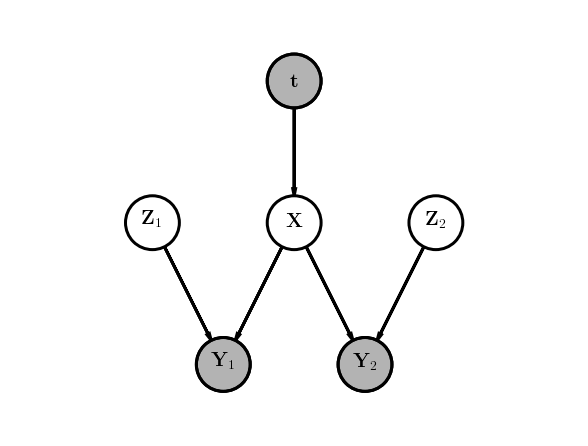

In [5]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':20})
rc("text", usetex=True)
pgm = plot.shared_gplvm()
pgm.render().figure.savefig("../../slides/diagrams/deepgp/shared.svg", transparent=True)

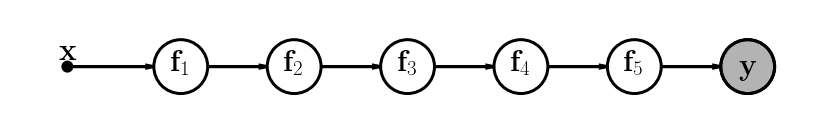

In [5]:

# ff = "comic sans ms"
ff = ''
# ff = "times new roman"

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':30})
rc("text", usetex=True)
#rc("font", family=ff, size=30)

pgm = plot.horizontal_chain(depth=5)
pgm.render().figure.savefig("../../slides/diagrams/deepgp/deep-markov.svg", transparent=True)

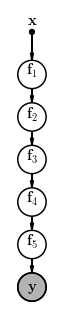

In [173]:
from matplotlib import rc
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':15})
rc("text", usetex=True)
pgm = plot.vertical_chain(depth=5)
pgm.render().figure.savefig("../../slides/diagrams/deepgp/deep-markov-vertical.svg", transparent=True)

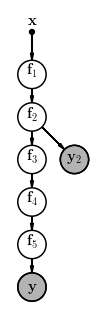

In [171]:
pgm = plot.vertical_chain(depth=5, shape=[2, 7])
pgm.add_node(daft.Node('y_2', r'$\mathbf{y}_2$', 1.5, 3.5, observed=True))
pgm.add_edge('f_2', 'y_2')
pgm.render().figure.savefig("../../slides/diagrams/deepgp/deep-markov-vertical-side.svg", transparent=True)

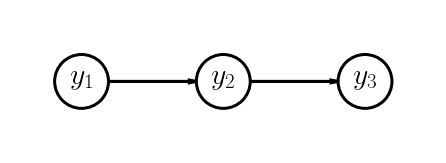

In [172]:
from matplotlib import rc

# ff = "comic sans ms"
ff = ''
# ff = "times new roman"

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=30)
rc("text", usetex=True)
#rc("font", family=ff, size=30)
pgm = daft.PGM(shape=[3, 1],
               origin=[0, 0], 
               grid_unit=5, 
               node_unit=1.9, 
               observed_style='shaded',
              line_width=3)


pgm.add_node(daft.Node("y_1", r"$y_1$", 0.5, 0.5, fixed=False))
pgm.add_node(daft.Node("y_2", r"$y_2$", 1.5, 0.5, fixed=False))
pgm.add_node(daft.Node("y_3", r"$y_3$", 2.5, 0.5, fixed=False))
pgm.add_edge("y_1", "y_2")
pgm.add_edge("y_2", "y_3")

pgm.render().figure.savefig("../../slides/diagrams/markov.svg", transparent=True)

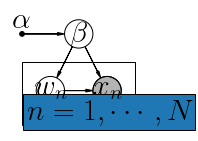

In [9]:
# Instantiate the PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3])

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("beta", r"$\beta$", 1.5, 2))

# Latent variable.
pgm.add_node(daft.Node("w", r"$w_n$", 1, 1))

# Data.
pgm.add_node(daft.Node("x", r"$x_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("classic.svg")
pgm.figure.savefig("classic.png", dpi=150)

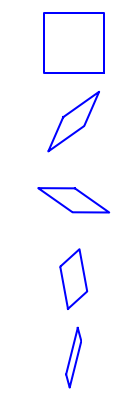

In [2]:
plot.stack_gp_sample(kernel=GPy.kern.Linear,
                     diagrams="../../slides/diagrams/deepgp")


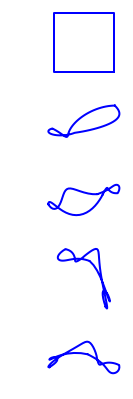

In [2]:
plot.stack_gp_sample(kernel=GPy.kern.RBF,
                     diagrams="../../slides/diagrams/deepgp")



In [9]:
%debug

> <ipython-input-8-2bfe50c2ae6c>(28)stack_gp_sample()
     26         K = []
     27         for j in range(len(latent_dims)):
---> 28             kern.append(GPy.kern.RBF(X[j].shape[1]))
     29             K.append(kern[j].K(X[j]))
     30             X.append(np.random.multivariate_normal(mean=np.zeros((num_time)), 

ipdb> X
[None]
ipdb> t
ipdb> q


In [207]:
np.row_stack((lim_val*np.ones((side_length)), 
                     np.linspace(-lim_val, lim_val, side_length)))

array([[ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ],
       [-0.5       , -0.45833333, -0.41666667, -0.375     , -0.33333333,
        -0.29166667, -0.25      , -0.20833333, -0.16666667, -0.125     ,
        -0.08333333, -0.04166667,  0.        ,  0.04166667,  0.08333333,
         0.125     ,  0.16666667,  0.20833333,  0.25      ,  0.29166667,
         0.33333333,  0.375     ,  0.41666667,  0.45833333,  0.5       ]])

In [227]:
len(X)

1

In [217]:
t.shape

(200, 1)